# PUM - Przewidywanie Pogody

**Autor**: s28889

## 1. Import bibliotek i wczytanie danych

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report


In [2]:
# Wczytanie danych
df = pd.read_csv('weather_Portland.csv')

display(df.head())

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RISK_MM,RainTomorrow
0,2009-01-01,Portland,12.5,16.6,0.0,4.8,6.5,SW,59.0,SW,...,99.0,1006.7,1010.5,NaN,6.0,13.7,14.5,No,1.6,Yes
1,2009-01-02,Portland,8.6,15.2,1.6,4.8,11.7,SSW,39.0,SW,...,61.0,1020.0,1021.3,6.0,2.0,11.9,14.0,Yes,0.2,No
2,2009-01-03,Portland,1.6,18.0,0.2,4.6,11.9,S,30.0,NE,...,52.0,1020.4,1018.3,6.0,3.0,11.6,17.5,No,0.0,No
3,2009-01-04,Portland,4.8,20.1,0.0,4.8,13.8,S,28.0,E,...,63.0,1016.4,1015.2,1.0,1.0,14.7,18.1,No,0.0,No
4,2009-01-05,Portland,4.4,18.8,0.0,5.6,13.6,W,46.0,W,...,68.0,1014.0,1013.4,4.0,3.0,14.9,18.0,No,0.0,No


## 2. Analiza Danych

In [3]:
# Statystyki opisowe
print('\nStatystyki opisowe:')
display(df.describe())


Statystyki opisowe:


,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RISK_MM
count,4872.000000,4873.000000,4848.000000,2478.000000,2478.000000,4818.000000,4872.000000,4873.000000,4833.000000,4872.000000,4870.000000,4875.000000,4019.000000,3876.000000,4834.000000,4873.000000,4848.000000
mean,9.502073,17.931869,2.468441,3.432123,6.511945,42.417393,16.552135,20.934537,78.868198,65.650657,1017.765770,1016.684492,6.537198,6.279154,13.073397,16.370573,2.468441
std,3.610951,5.151252,5.153556,2.654179,3.829715,15.002398,8.162318,8.480734,14.040497,14.981296,8.021874,7.856817,2.119101,2.279103,3.788308,4.847118,5.153556
min,-1.500000,9.000000,0.000000,0.000000,0.000000,13.000000,0.000000,0.000000,21.000000,9.000000,987.200000,985.500000,0.000000,0.000000,0.900000,5.200000,0.000000
25%,7.000000,14.200000,0.000000,1.400000,3.500000,31.000000,11.000000,15.000000,69.000000,57.000000,1012.500000,1011.600000,6.000000,5.000000,10.500000,12.900000,0.000000
50%,9.500000,16.800000,0.200000,2.800000,6.500000,39.000000,15.000000,20.000000,81.000000,65.000000,1018.100000,1017.000000,8.000000,7.000000,12.800000,15.400000,0.200000
75%,12.000000,20.200000,2.600000,4.800000,9.500000,52.000000,20.000000,26.000000,90.000000,75.000000,1023.400000,1022.200000,8.000000,8.000000,15.300000,18.700000,2.600000
max,23.800000,43.600000,72.000000,16.400000,14.300000,106.000000,57.000000,63.000000,100.000000,100.000000,1038.800000,1037.300000,8.000000,8.000000,31.300000,42.700000,72.000000


### 2.1 Analiza braków w danych


Braki w danych:


,Liczba braków,Procent (%)
Cloud3pm,1021,20.85
Cloud9am,878,17.93
Evaporation,2419,49.40
Humidity3pm,25,0.51
Humidity9am,64,1.31
MaxTemp,24,0.49
MinTemp,25,0.51
Pressure3pm,22,0.45
Pressure9am,27,0.55
RISK_MM,49,1.00


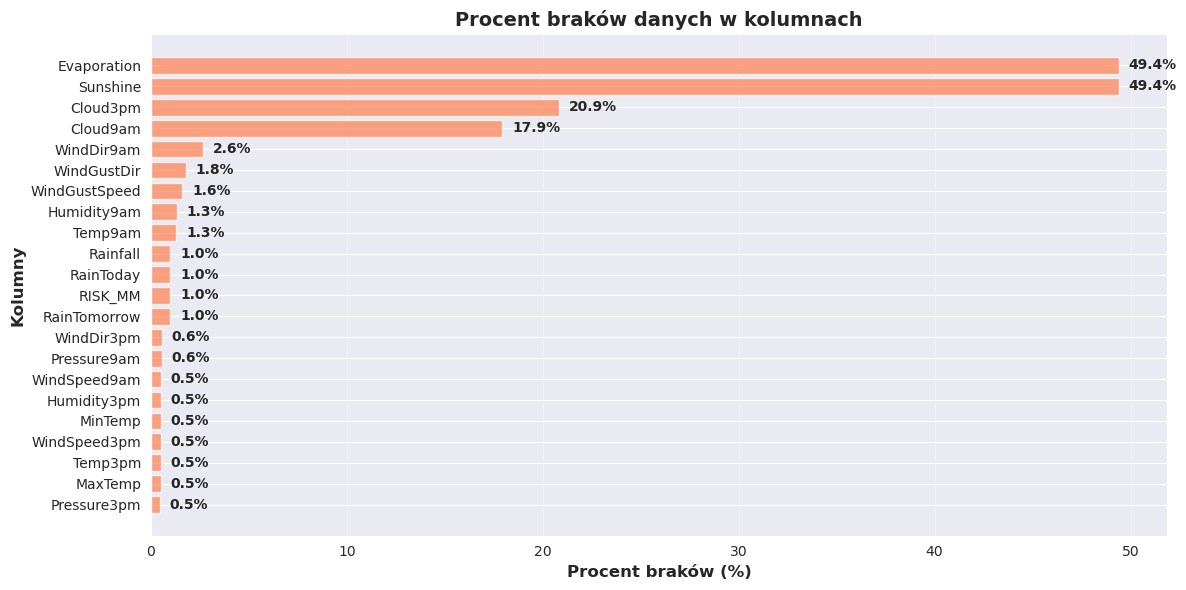

In [4]:
# Braki w danych
print('\nBraki w danych:')
missing_data = df.isnull().sum()
missing_percent = (df.isnull().mean() * 100).sort_values(ascending=False).round(2)

missing_df = pd.DataFrame({
    'Liczba braków': missing_data,
    'Procent (%)': missing_percent
})

display(missing_df[missing_df['Liczba braków'] > 0])

# Wizualizacja braków
missing_vis = missing_df[missing_df['Liczba braków'] > 0].sort_values('Procent (%)', ascending=True)

plt.figure(figsize=(12, 6))
plt.barh(missing_vis.index, missing_vis['Procent (%)'], color='coral', alpha=0.7)
plt.xlabel('Procent braków (%)', fontsize=12, fontweight='bold')
plt.ylabel('Kolumny', fontsize=12, fontweight='bold')
plt.title('Procent braków danych w kolumnach', fontsize=14, fontweight='bold')
plt.grid(axis='x', alpha=0.3)

for i, v in enumerate(missing_vis['Procent (%)']):
    plt.text(v + 0.5, i, f'{v:.1f}%', va='center', fontweight='bold')

plt.tight_layout()
plt.show()

### 2.2 Analiza zmiennej docelowej


Rozkład zmiennej docelowej (RainTomorrow):


RainTomorrow
No     3093
Yes    1755
Name: count, dtype: int64


Proporcje klas:


RainTomorrow
No     63.8
Yes    36.2
Name: proportion, dtype: float64

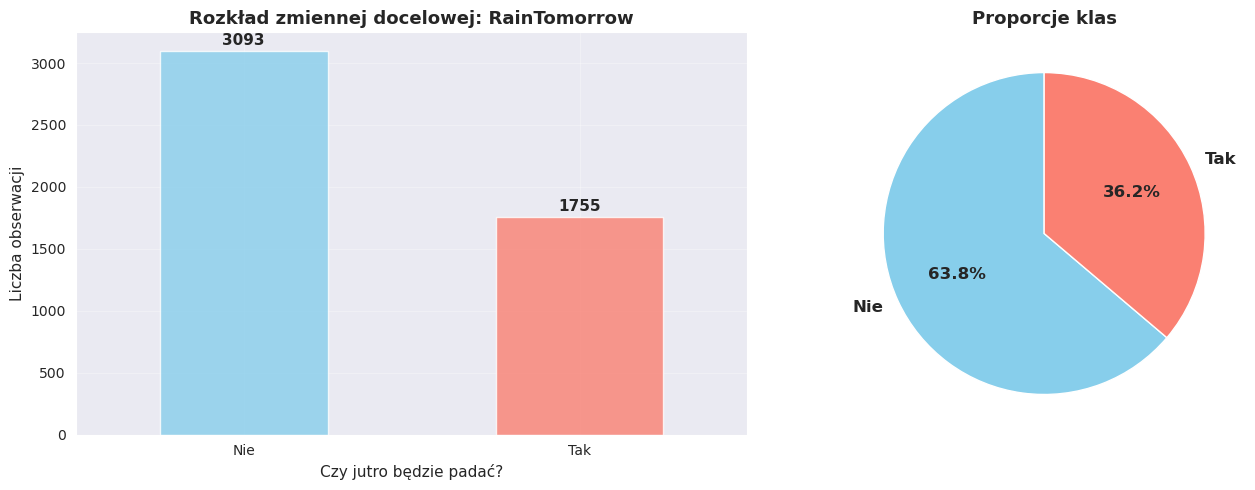

In [5]:
# Rozkład zmiennej docelowej
print('\nRozkład zmiennej docelowej (RainTomorrow):')

target_counts = df['RainTomorrow'].value_counts()
display(target_counts)

print('\nProporcje klas:')
target_prop = df['RainTomorrow'].value_counts(normalize=True) * 100
display(target_prop.round(2))

# Wizualizacja
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Wykres słupkowy
target_counts.plot(kind='bar', ax=axes[0], color=['skyblue', 'salmon'], alpha=0.8)
axes[0].set_title('Rozkład zmiennej docelowej: RainTomorrow', fontsize=13, fontweight='bold')
axes[0].set_xlabel('Czy jutro będzie padać?', fontsize=11)
axes[0].set_ylabel('Liczba obserwacji', fontsize=11)
axes[0].set_xticklabels(['Nie', 'Tak'], rotation=0)
axes[0].grid(alpha=0.3)
for i, v in enumerate(target_counts):
    axes[0].text(i, v + 50, str(v), ha='center', fontweight='bold', fontsize=11)

# Wykres kołowy
axes[1].pie(target_counts, labels=['Nie', 'Tak'], autopct='%1.1f%%',
            colors=['skyblue', 'salmon'], startangle=90, 
            textprops={'fontsize': 12, 'fontweight': 'bold'})
axes[1].set_title('Proporcje klas', fontsize=13, fontweight='bold')

plt.tight_layout()
plt.show()

### 2.3 Analiza korelacji

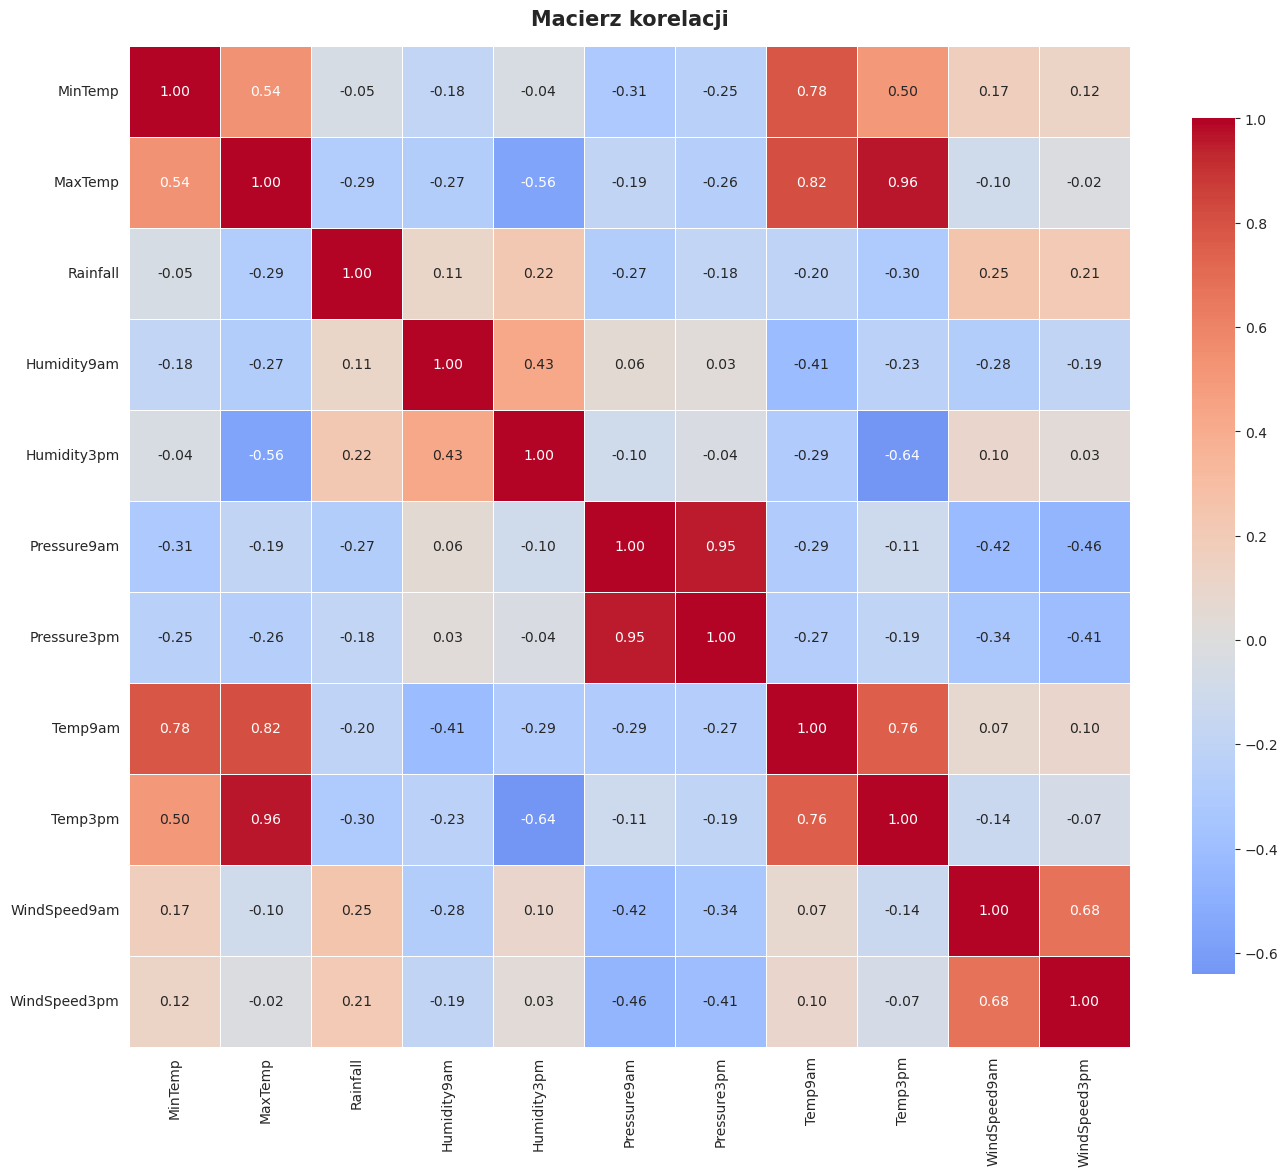

In [6]:
# Macierz korelacji
key_numeric = ['MinTemp', 'MaxTemp', 'Rainfall', 'Humidity9am', 'Humidity3pm', 
               'Pressure9am', 'Pressure3pm', 'Temp9am', 'Temp3pm', 'WindSpeed9am', 'WindSpeed3pm']

correlation_matrix = df[key_numeric].corr()

plt.figure(figsize=(14, 12))
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm',
            center=0, square=True, linewidths=0.5, cbar_kws={'shrink': 0.8})
plt.title('Macierz korelacji', fontsize=15, fontweight='bold', pad=15)
plt.tight_layout()
plt.show()

## 3. Przygotowanie Danych

### 3.1 Usunięcie niepotrzebnych kolumn

In [7]:
# Usunięcie zbędnych kolumn
cols_to_drop = ['Date', 'Location', 'RISK_MM', 'RainToday']

# Sprawdzenie kolumn czy istnieją i ich usunięcie
df = df.drop(columns=[col for col in cols_to_drop if col in df.columns])

### 3.2 Obsługa braków danych

In [8]:
# Usunięcie wierszy z brakami
df = df.dropna(subset=['RainTomorrow'])

# Wypełnienie braków medianą
numeric_cols = df.select_dtypes(include=[np.number]).columns.tolist()
imputer = SimpleImputer(strategy='median')
df[numeric_cols] = imputer.fit_transform(df[numeric_cols])

# Wypełnienie braków z najczęstszą wartością
categorical_cols = df.select_dtypes(include=['object']).columns.tolist()
if 'RainTomorrow' in categorical_cols:
    categorical_cols.remove('RainTomorrow')

for col in categorical_cols:
    df[col] = df[col].fillna(df[col].mode()[0])

print(f'\nWypełnione braki w {len(numeric_cols)} zmiennych numerycznych medianą')
print(f'Wypełnione braki w {len(categorical_cols)} zmiennych kategorycznych modą')

# Sprawdzanie braków po imputacji
remaining_missing = df.isnull().sum().sum()
print(f'\nPozostało braków: {remaining_missing}')


Wypełnione braki w 16 zmiennych numerycznych medianą
Wypełnione braki w 3 zmiennych kategorycznych modą

Pozostało braków: 0


### 3.3 Kodowanie zmiennych

In [9]:
# Kodowanie zmiennej
df['RainTomorrow'] = df['RainTomorrow'].map({'Yes': 1, 'No': 0})

# Kodowanie zmiennych
cols_to_encode = df.select_dtypes(include=['object']).columns

df = pd.get_dummies(df, columns=cols_to_encode, drop_first=True)

print('Gotowe dane do modelowania:')
display(df.head())

Gotowe dane do modelowania:


,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,...,WindDir3pm_NNW,WindDir3pm_NW,WindDir3pm_S,WindDir3pm_SE,WindDir3pm_SSE,WindDir3pm_SSW,WindDir3pm_SW,WindDir3pm_W,WindDir3pm_WNW,WindDir3pm_WSW
0,12.5,16.6,0.0,4.8,6.5,59.0,28.0,28.0,97.0,99.0,...,False,False,False,False,False,False,True,False,False,False
1,8.6,15.2,1.6,4.8,11.7,39.0,20.0,17.0,60.0,61.0,...,False,False,True,False,False,False,False,False,False,False
2,1.6,18.0,0.2,4.6,11.9,30.0,9.0,15.0,67.0,52.0,...,False,False,False,False,False,False,False,False,False,False
3,4.8,20.1,0.0,4.8,13.8,28.0,11.0,17.0,73.0,63.0,...,False,False,True,False,False,False,False,False,False,False
4,4.4,18.8,0.0,5.6,13.6,46.0,20.0,31.0,72.0,68.0,...,False,False,False,False,False,False,False,True,False,False


### 3.4 Podział danych na zbiór treningowy i testowy

In [10]:
# Separacja cech od zmiennej docelowej
X = df.drop('RainTomorrow', axis=1)
y = df['RainTomorrow']

# Podział 60/40
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.4, random_state=42, stratify=y
)

print(f'Zbiór treningowy (X_train): {X_train.shape}')
print(f'Zbiór testowy (X_test): {X_test.shape}')

Zbiór treningowy (X_train): (2908, 61)
Zbiór testowy (X_test): (1940, 61)


### 3.5 Standaryzacja danych

In [11]:
# Standaryzacja wszystkich cech
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print(f'Średnia cech po standaryzacji: {X_train_scaled.mean():.6f}')
print(f'Odchylenie standardowe cech: {X_train_scaled.std():.6f}')

Średnia cech po standaryzacji: -0.000000
Odchylenie standardowe cech: 1.000000


## 4. Budowa i Trening Modeli Klasyfikacyjnych

### 4.1 Regresja Logistyczna

In [12]:
# Model: Regresja Logistyczna
log_model = LogisticRegression(max_iter=1000, random_state=42)
log_model.fit(X_train_scaled, y_train)
y_pred_log = log_model.predict(X_test_scaled)
y_pred_log_proba = log_model.predict_proba(X_test_scaled)[:, 1]

print('==== REGRESJA LOGISTYCZNA ====')

print(f'Dokładność (Accuracy): {accuracy_score(y_test, y_pred_log):.4f}')
print('\nRaport klasyfikacji:')
print(classification_report(y_test, y_pred_log, target_names=['No Rain', 'Rain']))

==== REGRESJA LOGISTYCZNA ====
Dokładność (Accuracy): 0.7938

Raport klasyfikacji:
              precision    recall  f1-score   support

     No Rain       0.82      0.87      0.84      1238
        Rain       0.75      0.65      0.70       702

    accuracy                           0.79      1940
   macro avg       0.78      0.76      0.77      1940
weighted avg       0.79      0.79      0.79      1940



### 4.2 Drzewo Decyzyjne

In [13]:
# Model: Drzewo Decyzyjne (z kontrolą głębokości)
tree_model = DecisionTreeClassifier(max_depth=10, random_state=42)
tree_model.fit(X_train_scaled, y_train)
y_pred_tree = tree_model.predict(X_test_scaled)
y_pred_tree_proba = tree_model.predict_proba(X_test_scaled)[:, 1]

print('==== DRZEWO DECYZYJNE ====')

print(f'Dokładność (Accuracy): {accuracy_score(y_test, y_pred_tree):.4f}')
print('\nRaport klasyfikacji:')
print(classification_report(y_test, y_pred_tree, target_names=['No Rain', 'Rain']))

==== DRZEWO DECYZYJNE ====
Dokładność (Accuracy): 0.7479

Raport klasyfikacji:
              precision    recall  f1-score   support

     No Rain       0.79      0.82      0.81      1238
        Rain       0.66      0.63      0.64       702

    accuracy                           0.75      1940
   macro avg       0.73      0.72      0.72      1940
weighted avg       0.75      0.75      0.75      1940



### 4.3 Random forest

In [14]:
# Model: Random forest
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train_scaled, y_train)
y_pred_rf = rf_model.predict(X_test_scaled)
y_pred_rf_proba = rf_model.predict_proba(X_test_scaled)[:, 1]

print('==== RANDOM FOREST ====')

print(f'Dokładność (Accuracy): {accuracy_score(y_test, y_pred_rf):.4f}')
print('\nRaport klasyfikacji:')
print(classification_report(y_test, y_pred_rf, target_names=['No Rain', 'Rain']))

==== RANDOM FOREST ====
Dokładność (Accuracy): 0.8108

Raport klasyfikacji:
              precision    recall  f1-score   support

     No Rain       0.83      0.89      0.86      1238
        Rain       0.78      0.67      0.72       702

    accuracy                           0.81      1940
   macro avg       0.80      0.78      0.79      1940
weighted avg       0.81      0.81      0.81      1940



## 5. Porównanie Modeli

In [15]:
# Zebranie wyników wszystkich modeli
from sklearn.metrics import precision_score, recall_score, f1_score

models_results = {
    'Regresja Logistyczna': {
        'y_pred': y_pred_log,
        'y_pred_proba': y_pred_log_proba
    },
    'Drzewo Decyzyjne': {
        'y_pred': y_pred_tree,
        'y_pred_proba': y_pred_tree_proba
    },
    'Random forest': {
        'y_pred': y_pred_rf,
        'y_pred_proba': y_pred_rf_proba
    }
}

# Tworzenie tabeli porównawczej
comparison_data = []
for model_name, results in models_results.items():
    y_pred = results['y_pred']
    y_pred_proba = results['y_pred_proba']
    
    comparison_data.append({
        'Model': model_name,
        'Accuracy': accuracy_score(y_test, y_pred),
        'Precision (Rain)': precision_score(y_test, y_pred),
        'Recall (Rain)': recall_score(y_test, y_pred),
        'F1-Score (Rain)': f1_score(y_test, y_pred)
    })

comparison_df = pd.DataFrame(comparison_data)
comparison_df = comparison_df.sort_values('F1-Score (Rain)', ascending=False)

print('Podsumowanie wyników modeli:')
display(comparison_df.round(4))

Podsumowanie wyników modeli:


,Model,Accuracy,Precision (Rain),Recall (Rain),F1-Score (Rain)
2,Random forest,0.8108,0.7778,0.6681,0.7188
0,Regresja Logistyczna,0.7938,0.7451,0.6538,0.6965
1,Drzewo Decyzyjne,0.7479,0.6597,0.6268,0.6428


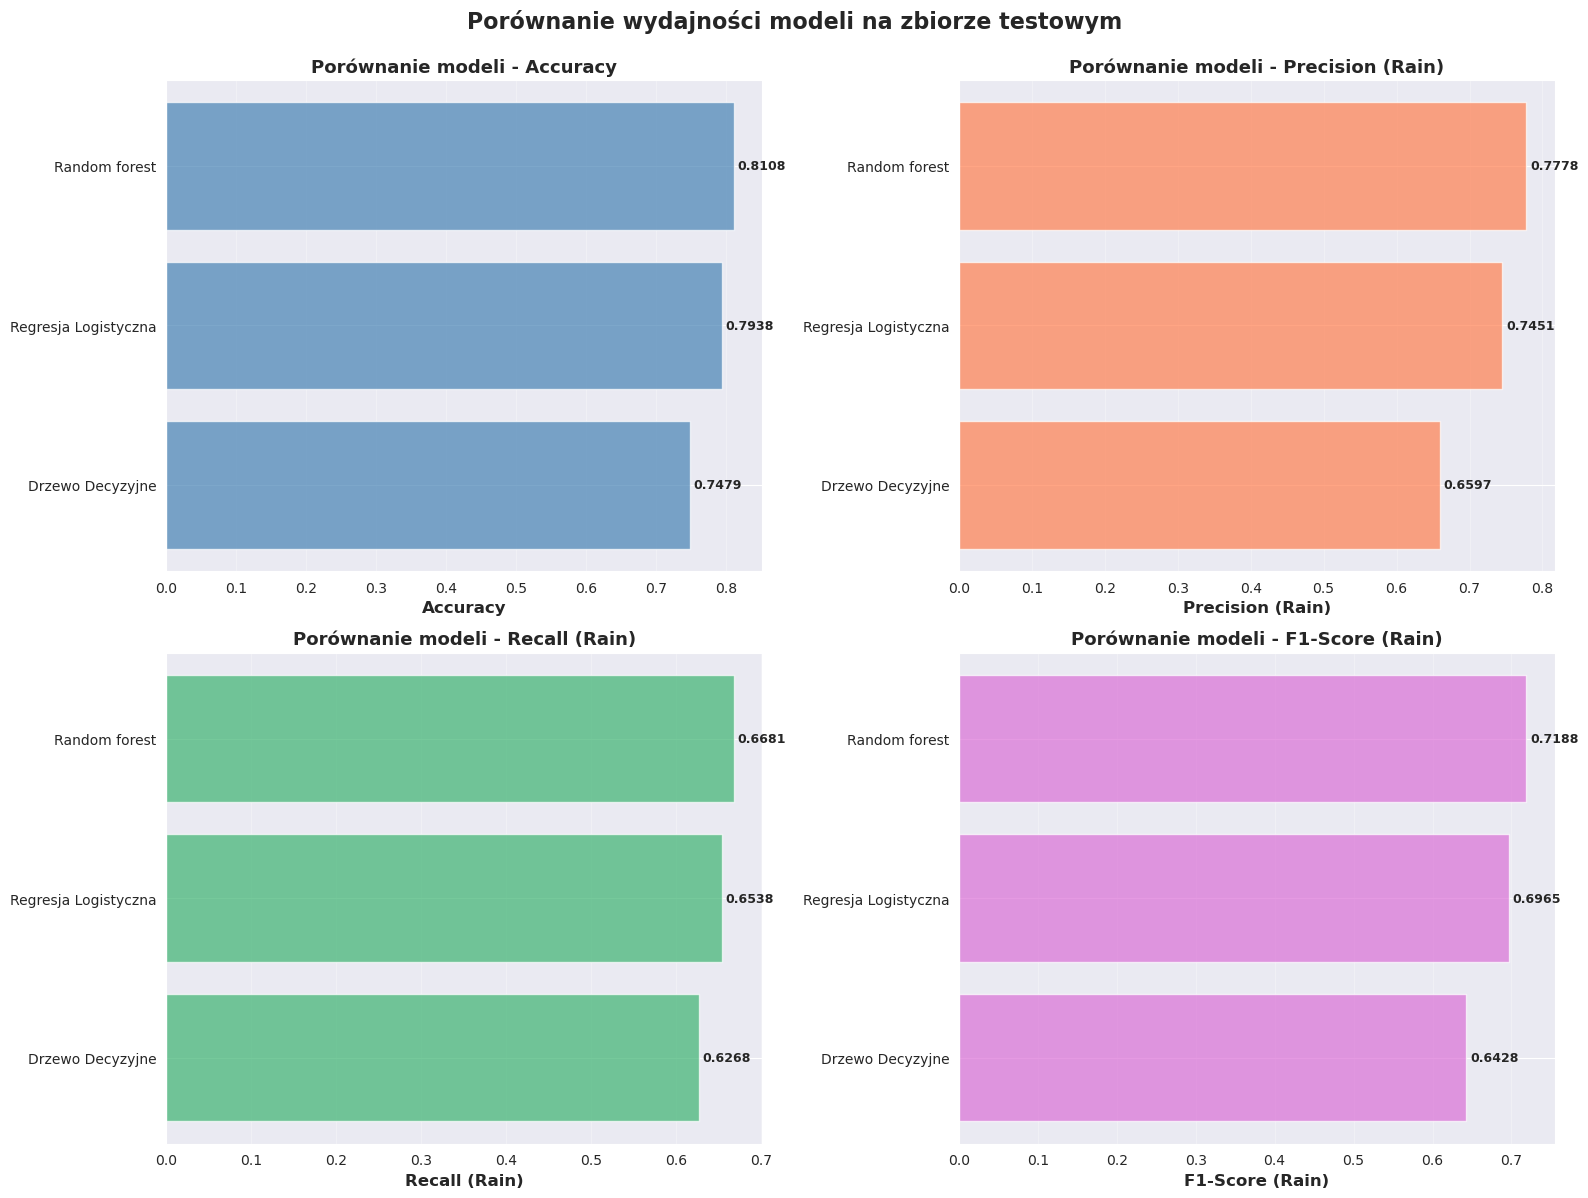

In [16]:
# Wizualizacja porównania modeli
fig, axes = plt.subplots(2, 2, figsize=(16, 12))

metrics = ['Accuracy', 'Precision (Rain)', 'Recall (Rain)', 'F1-Score (Rain)']
colors = ['steelblue', 'coral', 'mediumseagreen', 'orchid']

for idx, (ax, metric, color) in enumerate(zip(axes.flatten(), metrics, colors)):
    sorted_data = comparison_df.sort_values(metric, ascending=True)
    ax.barh(sorted_data['Model'], sorted_data[metric], color=color, alpha=0.7)
    ax.set_xlabel(metric, fontsize=12, fontweight='bold')
    ax.set_title(f'Porównanie modeli - {metric}', fontsize=13, fontweight='bold')
    ax.grid(axis='x', alpha=0.3)

    for i, v in enumerate(sorted_data[metric]):
        ax.text(v + 0.005, i, f'{v:.4f}', va='center', fontweight='bold', fontsize=9)

plt.suptitle('Porównanie wydajności modeli na zbiorze testowym',
             fontsize=16, fontweight='bold', y=0.995)
plt.tight_layout()
plt.show()

## 7. Analiza wyników i wnioski

### 7.1 Podsumowanie wyników

Wszystkie zastosowane modele klasyfikacyjne osiągnęły dość wysoką dokładność (Accuracy), mieszczącą się w przedziale **80–85%**. Na pierwszy rzut oka może się wydawać, że są to bardzo dobre wyniki. Jednak sama dokładność nie daje pełnego obrazu skuteczności modeli, szczególnie że zbiór danych jest **niezbalansowany**.

### 7.2 Problem niezbalansowania klas

W analizowanym zbiorze danych przeważają dni **bez deszczu (około 64%)**, natomiast dni **z deszczem stanowią około 36%** wszystkich obserwacji. Taka nierównowaga powoduje, że modele uczą się głównie poprawnego rozpoznawania klasy większościowej, czyli dni bez opadów.

W efekcie:
- modele osiągają bardzo wysoką wartość **Recall dla klasy „No Rain” (około 90%)**,
- wysoka skuteczność dla klasy większościowej zawyża ogólną wartość Accuracy,
- dlatego kluczowe staje się analizowanie metryk dla klasy **„Rain”**, takich jak Precision, Recall oraz F1-Score.

### 7.3 Analiza klasy „Rain” (dni deszczowe)

Najważniejszym celem modeli jest poprawne wykrywanie dni, w których występuje deszcz.

**Recall (czułość):**
Najlepsze wyniki osiągnął model **Random Forest**, dla którego Recall wynosi około **70–72%**. Oznacza to, że model poprawnie wykrywa około **70% dni deszczowych**, jednak nadal **około 30% takich dni nie jest rozpoznawanych** (False Negatives).

**Precision (precyzja):**
Dla najlepszych modeli Precision wynosi około **78–81%**. Oznacza to, że gdy model przewiduje wystąpienie deszczu, prognoza ta jest poprawna w około **80% przypadków**. Jednocześnie około **20% prognoz deszczu to fałszywe alarmy**.

**F1-Score:**
Najlepsze modele osiągają wartość F1-Score na poziomie **około 0.76**, co wskazuje na dobrą równowagę pomiędzy precyzją a czułością.

### 7.4 Porównanie modeli

- **Random Forest** okazał się najlepszym modelem. Osiągnął najwyższą dokładność (**około 85%**) oraz najlepszy F1-Score dla klasy „Rain” (**około 0.76**). Dobrze radzi sobie z wykrywaniem dni deszczowych (Recall **70–72%**).

- **Regresja logistyczna** osiągnęła dokładność na poziomie **około 81%** oraz F1-Score równy **około 0.71**. Jej czułość dla klasy „Rain” jest nieco niższa i wynosi **około 64–65%**.

- **Drzewo decyzyjne** uzyskało dokładność na poziomie **około 83%** oraz F1-Score **około 0.73**, jednak jego skuteczność w wykrywaniu dni deszczowych była gorsza niż w przypadku najlepszego modelu.

### 7.5 Najważniejsze cechy

Analiza ważności cech w modelu Random Forest pokazuje, że największy wpływ na przewidywanie deszczu mają:
- wilgotność powietrza (Humidity3pm, Humidity9am),
- ciśnienie atmosferyczne (Pressure9am, Pressure3pm),
- temperatura (Temp3pm, MaxTemp, MinTemp),
- zachmurzenie (Cloud3pm, Cloud9am),
- prędkość wiatru (WindSpeed3pm, WindGustSpeed).

Są to cechy zgodne z wiedzą meteorologiczną, co potwierdza poprawność działania modelu.

### 7.6 Wnioski końcowe

Podsumowując, modele osiągnęły dobrą ogólną skuteczność, jednak ich największym problemem jest **niedostateczne wykrywanie dni deszczowych**.

**Zalety:**
- wysoka ogólna dokładność (**80–85%**),
- bardzo dobre wykrywanie dni bez deszczu (Recall **~90%**),
- stosunkowo wysoka precyzja dla klasy „Rain” (**~80%**).

**Wady:**
- około **30% dni deszczowych nie jest wykrywanych** przez najlepsze modele,
- niezbalansowanie klas ma duży wpływ na wyniki,
- wysoka Accuracy nie zawsze oznacza dobrą jakość prognoz opadów.

W przyszłości, aby poprawić wykrywanie dni deszczowych, warto rozważyć zastosowanie metod balansowania danych lub zmianę progu decyzyjnego.
